<a href="https://colab.research.google.com/github/Xtian76/-MS-Progression-Prediction/blob/main/debugg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

1/
    training/
        license.txt.bak
        2017-NI-Carass-Longitudinal-multiple-sclerosis-lesion-segmentation-Resource-and-challenge.pdf
        license.txt
        training05/
            masks/
                training05_03_mask2.nii
                training05_02_mask2.nii
                training05_04_mask1.nii
                training05_02_mask1.nii
                training05_04_mask2.nii
                training05_01_mask2.nii
                training05_01_mask1.nii
                training05_03_mask1.nii
            preprocessed/
                training05_02_flair_pp.nii
                training05_01_flair_pp.nii
                training05_04_flair_pp.nii
                training05_04_t2_pp.nii
                training05_04_pd_pp.nii
                training05_04_mprage_pp.nii
                training05_02_t2_pp.nii
                training05_03_mprage_pp.nii
                training05_03_flair_pp.nii
                training05_01_t2_pp.nii
                training05_03_t2

In [5]:
import os

# Dictionary to store paired files
paired_files = {}

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.nii'):
            # Extract subject and scan identifier from filename
            parts = f.split('_')
            if len(parts) >= 3:
                subject_scan = '_'.join(parts[:2]) # e.g., trainingXX_YY

                if subject_scan not in paired_files:
                    paired_files[subject_scan] = {'flair': None, 'masks': []}

                if 'flair' in f:
                    if 'preprocessed' in root:
                        paired_files[subject_scan]['flair_pp'] = os.path.join(root, f)
                    else:
                        paired_files[subject_scan]['flair_orig'] = os.path.join(root, f)
                elif 'mask' in f:
                    paired_files[subject_scan]['masks'].append(os.path.join(root, f))

# Now you can access the paired files, for example:
# for subject_scan, files in paired_files.items():
#     print(f"Subject and Scan: {subject_scan}")
#     print(f"  Original FLAIR: {files.get('flair_orig')}")
#     print(f"  Preprocessed FLAIR: {files.get('flair_pp')}")
#     print(f"  Masks: {files.get('masks')}")

# You can now use the 'paired_files' dictionary for further processing.
print("Paired files dictionary created. You can inspect it by uncommenting the print statements.")

Paired files dictionary created. You can inspect it by uncommenting the print statements.


# ISBI MS Dataset Analysis Notebook

This notebook demonstrates how to download, inspect, and organize the ISBI Multiple Sclerosis Lesion Segmentation dataset.

## 1. Download the dataset

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marwa96/isbi-ms-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'isbi-ms-dataset' dataset.
Path to dataset files: /kaggle/input/isbi-ms-dataset


## 2. Inspect file structure

Let's examine the directory structure of the downloaded dataset to understand how the files are organized.

In [11]:
import os

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))

isbi-ms-dataset/
    training/
        2017-NI-Carass-Longitudinal-multiple-sclerosis-lesion-segmentation-Resource-and-challenge.pdf
        license.txt.bak
        license.txt
        training05/
            preprocessed/
                training05_02_mprage_pp.nii
                training05_03_pd_pp.nii
                training05_04_t2_pp.nii
                training05_01_t2_pp.nii
                training05_04_flair_pp.nii
                training05_03_mprage_pp.nii
                training05_03_t2_pp.nii
                training05_03_flair_pp.nii
                training05_01_pd_pp.nii
                training05_04_pd_pp.nii
                training05_02_t2_pp.nii
                training05_02_flair_pp.nii
                training05_01_mprage_pp.nii
                training05_04_mprage_pp.nii
                training05_01_flair_pp.nii
                training05_02_pd_pp.nii
            orig/
                training05_01_mprage.nii
                training05_04_t2.nii
             

## 3. Pair FLAIR images with masks

Based on the file naming convention, we can pair the FLAIR images with their corresponding masks using the subject and scan identifiers (e.g., `trainingXX_YY`).

In [12]:
import os

# Dictionary to store paired files
paired_files = {}

# Assuming 'path' variable from the previous step holds the dataset path
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.nii'):
            # Extract subject and scan identifier from filename
            parts = f.split('_')
            if len(parts) >= 3:
                subject_scan = '_'.join(parts[:2]) # e.g., trainingXX_YY

                if subject_scan not in paired_files:
                    paired_files[subject_scan] = {'flair_orig': None, 'flair_pp': None, 'masks': []}

                if 'flair' in f:
                    if 'preprocessed' in root:
                        paired_files[subject_scan]['flair_pp'] = os.path.join(root, f)
                    else:
                        paired_files[subject_scan]['flair_orig'] = os.path.join(root, f)
                elif 'mask' in f:
                    paired_files[subject_scan]['masks'].append(os.path.join(root, f))

# You can now access the paired files, for example:
# for subject_scan, files in paired_files.items():
#     print(f"Subject and Scan: {subject_scan}")
#     print(f"  Original FLAIR: {files.get('flair_orig')}")
#     print(f"  Preprocessed FLAIR: {files.get('flair_pp')}")
#     print(f"  Masks: {files.get('masks')}")

print(f"Created paired_files dictionary with {len(paired_files)} entries.")

Created paired_files dictionary with 21 entries.


## 4. Further Analysis (Optional)

Now that you have the files paired, you can proceed with further analysis steps such as:

- **Loading image data**: Use libraries like `nibabel` to load the `.nii` image and mask files into arrays.
- **Visualization**: Visualize the images and masks to inspect the data.
- **Preprocessing**: Apply any necessary preprocessing steps to the image data.
- **Model Training**: Use the paired images and masks to train a segmentation model.

Here's an example of how you might load an image and its masks using `nibabel`:

In [13]:
# Example of loading an image and its masks using nibabel
# import nibabel as nib

# # Choose a subject and scan identifier from your paired_files dictionary
# example_subject_scan = list(paired_files.keys())[0]
# example_files = paired_files[example_subject_scan]

# # Load the preprocessed FLAIR image
# if example_files.get('flair_pp'):
#     flair_img = nib.load(example_files['flair_pp'])
#     flair_data = flair_img.get_fdata()
#     print(f"Loaded FLAIR image with shape: {flair_data.shape}")

# # Load the masks
# mask_data = []
# for mask_file in example_files.get('masks', []):
#     mask_img = nib.load(mask_file)
#     mask_data.append(mask_img.get_fdata())
#     print(f"Loaded mask with shape: {mask_img.get_fdata().shape}")

# # Now you can work with flair_data and mask_data for analysis or modeling

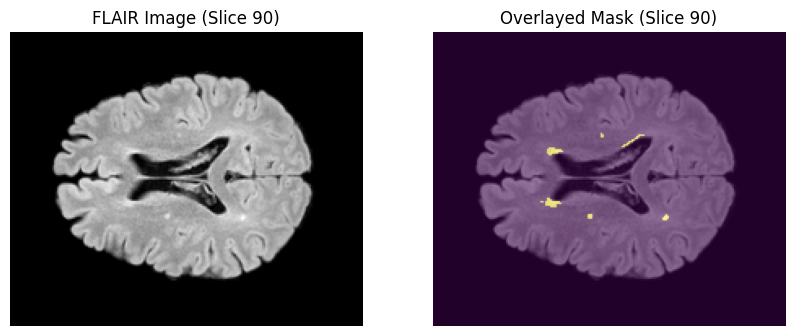

In [15]:
# Install nibabel if you haven't already
!pip install nibabel matplotlib

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Choose a subject and scan identifier from your paired_files dictionary
# Make sure the paired_files dictionary is available from previous steps
if 'paired_files' in locals() and len(paired_files) > 0:
    example_subject_scan = list(paired_files.keys())[0]
    example_files = paired_files[example_subject_scan]

    flair_img_path = example_files.get('flair_pp') or example_files.get('flair_orig')
    mask_files_paths = example_files.get('masks', [])

    if flair_img_path:
        # Load the FLAIR image
        flair_img = nib.load(flair_img_path)
        flair_data = flair_img.get_fdata()

        # Load the masks and combine them into one mask for visualization
        combined_mask_data = None
        for mask_file in mask_files_paths:
            mask_img = nib.load(mask_file)
            mask_data = mask_img.get_fdata()
            if combined_mask_data is None:
                combined_mask_data = mask_data
            else:
                combined_mask_data = np.maximum(combined_mask_data, mask_data) # Combine masks

        # Visualize a slice
        slice_idx = flair_data.shape[2] // 2 # Choose a middle slice

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(flair_data[:, :, slice_idx], cmap='gray')
        plt.title(f'FLAIR Image (Slice {slice_idx})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(flair_data[:, :, slice_idx], cmap='gray') # Display FLAIR as background
        if combined_mask_data is not None:
            # Overlay the mask with some transparency
            plt.imshow(combined_mask_data[:, :, slice_idx], cmap='viridis', alpha=0.5)
            plt.title(f'Overlayed Mask (Slice {slice_idx})')
        else:
             plt.title(f'No Masks Found (Slice {slice_idx})')
        plt.axis('off')

        plt.show()

    else:
        print("No FLAIR image found for the example subject and scan.")
else:
    print("paired_files dictionary not found or is empty. Please run the previous steps to create it.")

In [16]:
# =============================================================================
# CELDA 1: Instalación de librerías (ejecutar solo una vez)
# =============================================================================
print("📦 Instalando librerías necesarias...")
print("Esto puede tardar 2-3 minutos...\n")

!pip install -q nibabel nilearn SimpleITK
!pip install -q pandas numpy scikit-learn
!pip install -q xgboost shap matplotlib seaborn
!pip install -q scikit-image
!pip install -q openpyxl

print("✅ Instalación completada!")

# =============================================================================
# CELDA 2: Importar librerías
# =============================================================================
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from skimage import measure
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")
print(f"📍 Versiones:")
print(f"   - NumPy: {np.__version__}")
print(f"   - Pandas: {pd.__version__}")
print(f"   - Nibabel: {nib.__version__}")

📦 Instalando librerías necesarias...
Esto puede tardar 2-3 minutos...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.3 MB/s eta 0:00:00
✅ Instalación completada!
✅ Librerías importadas correctamente
📍 Versiones:
   - NumPy: 2.0.2
   - Pandas: 2.2.2
   - Nibabel: 5.3.2


Remember to install `nibabel` if you haven't already:
`!pip install nibabel`

In [21]:
import pandas as pd
import nibabel as nib
import numpy as np
import os

# Make sure the feature extraction functions are defined and paired_files dictionary is available
if 'extract_intensity_features' in globals() and 'extract_mask_features' in globals() and 'paired_files' in locals():

    all_features = []

    print(f"Extracting features for {len(paired_files)} subjects/scans...")

    for subject_scan, files in paired_files.items():
        flair_img_path = files.get('flair_pp') or files.get('flair_orig')
        mask_files_paths = files.get('masks', [])

        if flair_img_path:
            try:
                # Load FLAIR image
                flair_img = nib.load(flair_img_path)
                flair_data = flair_img.get_fdata()
                voxel_spacing = flair_img.header.get_zooms()[:3] # Get voxel spacing

                # Combine masks if multiple exist
                combined_mask_data = None
                if mask_files_paths:
                    for mask_file in mask_files_paths:
                        mask_img = nib.load(mask_file)
                        mask_data = mask_img.get_fdata()
                        if combined_mask_data is None:
                            combined_mask_data = mask_data
                        else:
                            combined_mask_data = np.maximum(combined_mask_data, mask_data) # Combine masks

                # Extract features
                intensity_features = extract_intensity_features(flair_data, combined_mask_data)
                mask_features = extract_mask_features(combined_mask_data, voxel_spacing) if combined_mask_data is not None else {}

                # Combine all features for this subject/scan
                subject_features = {'subject_scan': subject_scan}
                subject_features.update(intensity_features)
                subject_features.update(mask_features)

                all_features.append(subject_features)
                print(f"Extracted features for {subject_scan}")

            except Exception as e:
                print(f"Error processing {subject_scan}: {e}")
                # Optionally, append an entry with an error flag or skip

    # Convert the list of dictionaries to a pandas DataFrame
    df_features = pd.DataFrame(all_features)

    print("\nFeature extraction complete.")
    print("DataFrame with extracted features created:")
    display(df_features.head())

else:
    print("Feature extraction functions or paired_files dictionary not found. Please run the previous steps.")

Extracting features for 21 subjects/scans...
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_02
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_03
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_04
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training05_01
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training04_03
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training04_02
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracted features for training04_04
Could not calculate surface area: No skimage.measure attribute marching_cubes_lewiner
Extracte

,subject_scan,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,volume_ml,surface_area_approx
0,training05_02,26121.413550,25970.917969,2286.140604,12966.480469,33917.613281,5.226439e+06,-0.449844,2.888297,6031,6.031,None
1,training05_03,688.151628,689.446838,69.232025,357.049652,920.454468,4.793073e+03,-0.533067,1.569744,5535,5.535,None
2,training05_04,759.117518,757.074402,66.487870,375.551880,961.033936,4.420637e+03,-0.389996,1.829467,5455,5.455,None
3,training05_01,47612.571214,47344.554688,4801.652008,29175.527344,66174.171875,2.305586e+07,-0.006845,1.559989,5895,5.895,None
4,training04_03,697.740505,695.647003,98.550505,98.588974,1056.841187,9.712202e+03,-0.946744,3.399445,3856,3.856,None


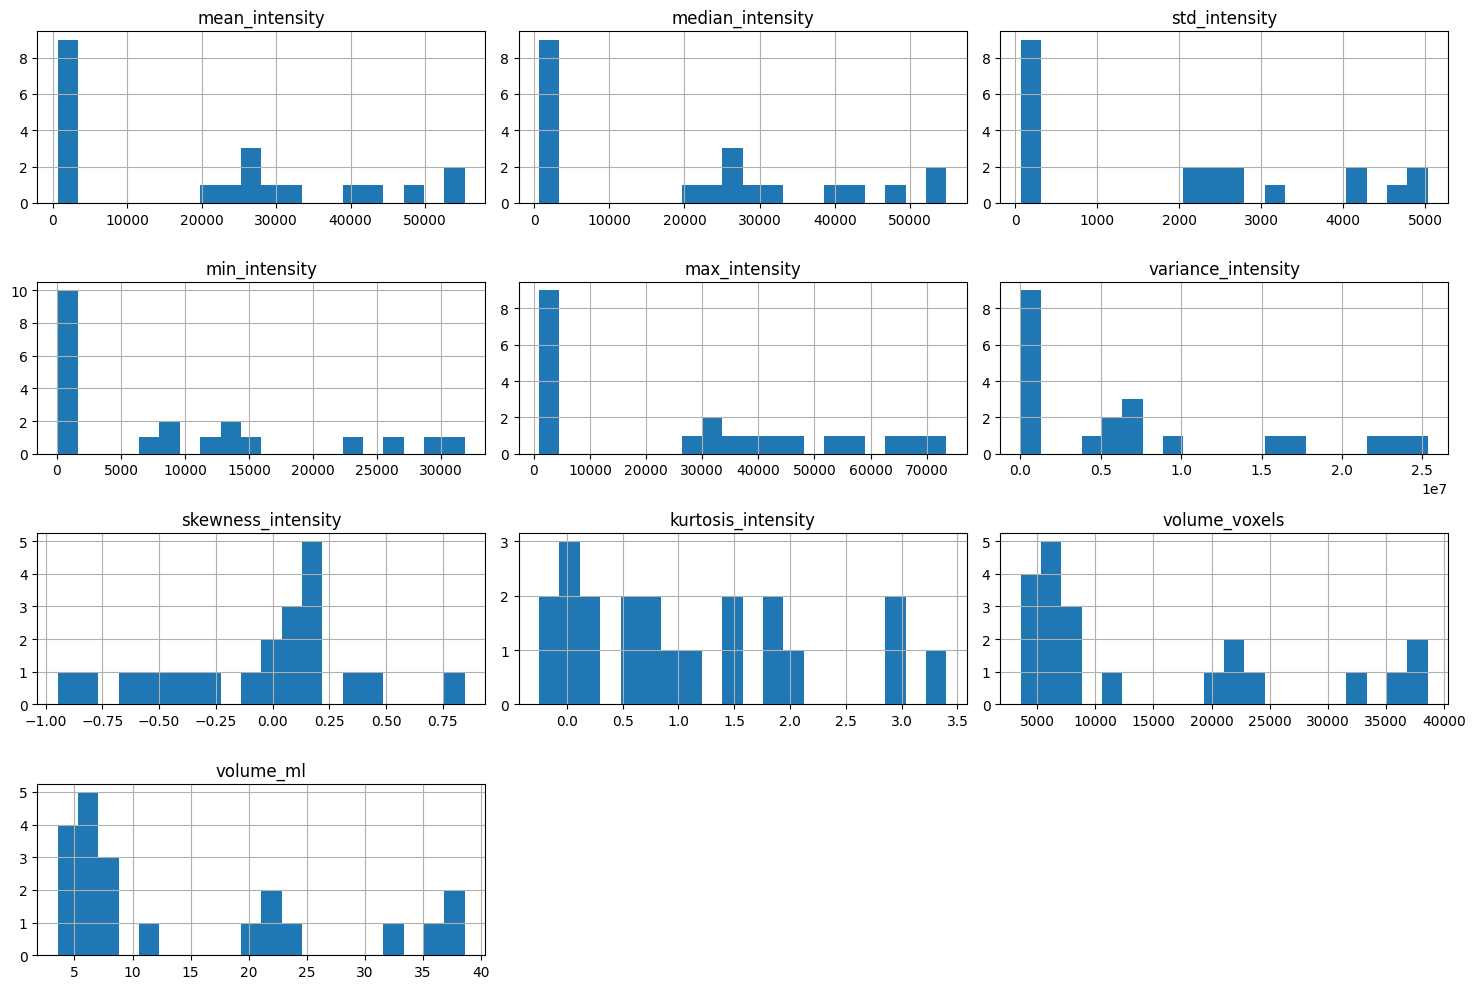

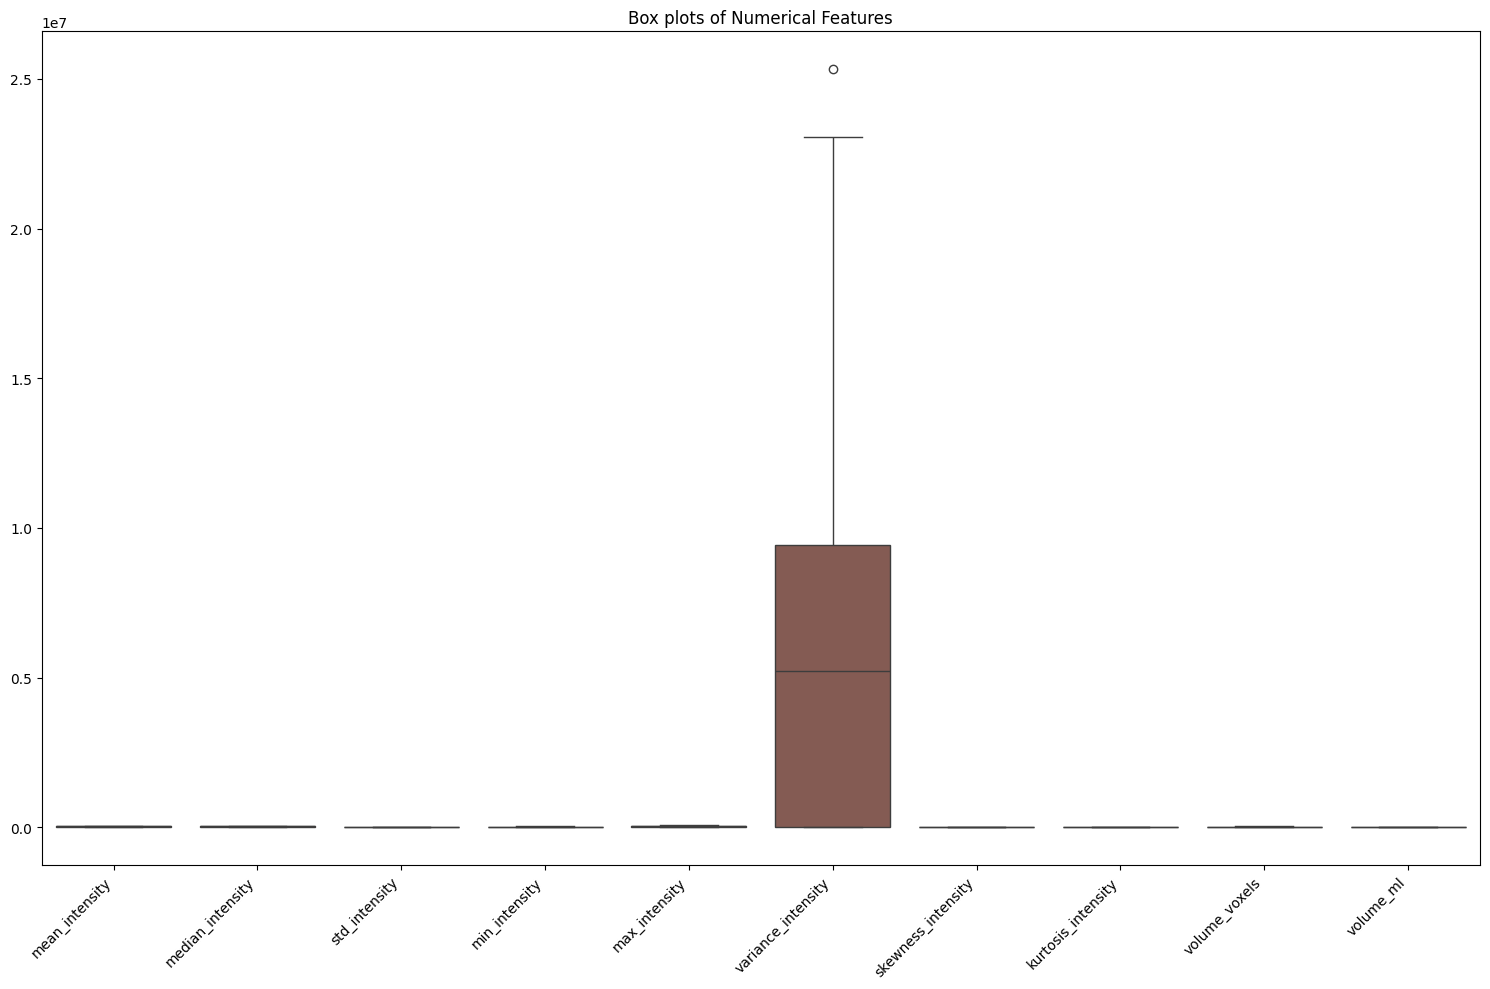

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for visualization
numerical_features = df_features.select_dtypes(include=np.number)

# Plot histograms for numerical features
numerical_features.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# You can also create box plots to see the distribution and outliers
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=numerical_features)
# plt.title('Box plots of Numerical Features')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

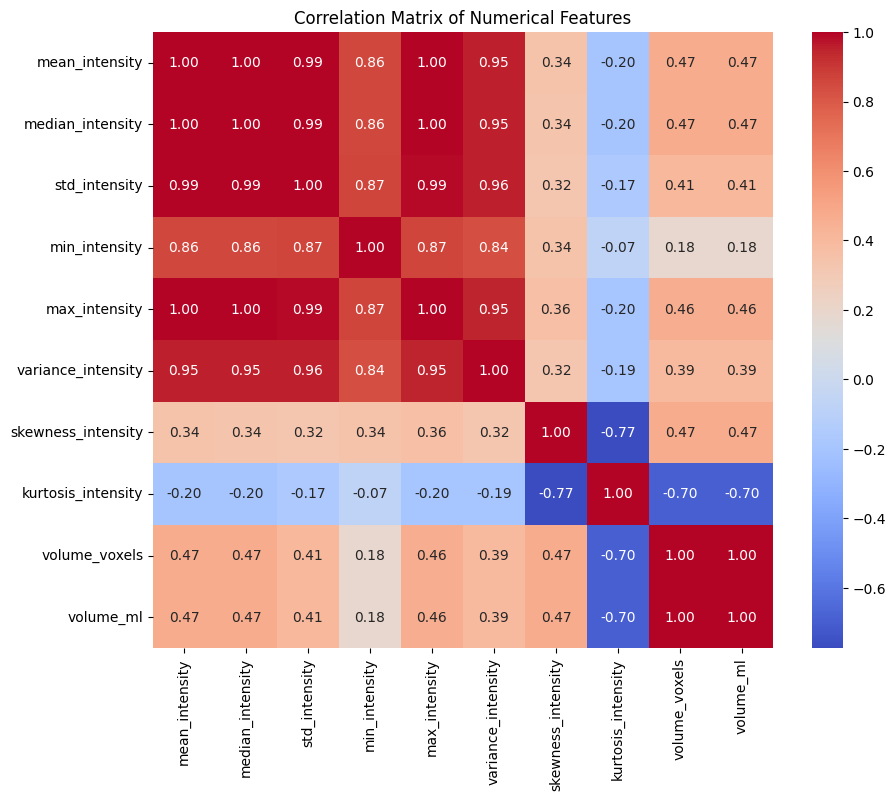

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numerical_features = df_features.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [22]:
# Display the first few rows of the DataFrame
print("First 5 rows of the features DataFrame:")
display(df_features.head())

# Get information about the DataFrame (columns, data types, non-null counts)
print("\nDataFrame Info:")
df_features.info()

# Get descriptive statistics for the numerical features
print("\nDescriptive Statistics:")
display(df_features.describe())

First 5 rows of the features DataFrame:


,subject_scan,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,volume_ml,surface_area_approx
0,training05_02,26121.413550,25970.917969,2286.140604,12966.480469,33917.613281,5.226439e+06,-0.449844,2.888297,6031,6.031,None
1,training05_03,688.151628,689.446838,69.232025,357.049652,920.454468,4.793073e+03,-0.533067,1.569744,5535,5.535,None
2,training05_04,759.117518,757.074402,66.487870,375.551880,961.033936,4.420637e+03,-0.389996,1.829467,5455,5.455,None
3,training05_01,47612.571214,47344.554688,4801.652008,29175.527344,66174.171875,2.305586e+07,-0.006845,1.559989,5895,5.895,None
4,training04_03,697.740505,695.647003,98.550505,98.588974,1056.841187,9.712202e+03,-0.946744,3.399445,3856,3.856,None



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_scan         21 non-null     object 
 1   mean_intensity       21 non-null     float64
 2   median_intensity     21 non-null     float64
 3   std_intensity        21 non-null     float64
 4   min_intensity        21 non-null     float64
 5   max_intensity        21 non-null     float64
 6   variance_intensity   21 non-null     float64
 7   skewness_intensity   21 non-null     float64
 8   kurtosis_intensity   21 non-null     float64
 9   volume_voxels        21 non-null     int64  
 10  volume_ml            21 non-null     float64
 11  surface_area_approx  0 non-null      object 
dtypes: float64(9), int64(1), object(2)
memory usage: 2.1+ KB

Descriptive Statistics:


,mean_intensity,median_intensity,std_intensity,min_intensity,max_intensity,variance_intensity,skewness_intensity,kurtosis_intensity,volume_voxels,volume_ml
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000
mean,20582.487274,20431.363722,1957.014463,9165.420488,27956.544143,7.098801e+06,-0.068734,1.089245,14752.285714,14.752286
std,19664.394056,19512.773484,1852.657515,10603.596575,26590.755506,8.560366e+06,0.444073,1.101777,12364.285714,12.364286
min,672.067901,664.625275,63.225575,56.187332,920.454468,3.997473e+03,-0.946744,-0.249055,3555.000000,3.555000
25%,759.117518,757.074402,80.967445,375.551880,1056.841187,6.555727e+03,-0.389996,0.132513,5535.000000,5.535000
50%,24449.127219,24140.201172,2286.140604,7198.165527,32311.494141,5.226439e+06,0.060910,0.767736,7756.000000,7.756000
75%,32522.188840,32176.144531,3069.512832,13594.948242,45149.457031,9.421909e+06,0.163374,1.829467,21353.000000,21.353000
max,55354.157243,54829.019531,5032.518756,31867.367188,73498.554688,2.532625e+07,0.847213,3.399445,38607.000000,38.607000
